In [1]:
import geopandas as gpd
import pandas as pd
import shapely
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from shapely.geometry import *
from utils import *
import warnings

In [2]:
warnings.filterwarnings("ignore")
crsEuc,crsDeg=getUsualCRS()
bboxEuc,bboxDeg=getUsualBbox()

Lisbon=bbox(38.8076, 38.6952, -9.0929, -9.2694)
Lisbon1=Lisbon.convertToXY()

categories=list(taxonomy().keys())
pois,clusters=loadClusters(categories=categories,crs=crsEuc,folderDir="../datasets/pois/clusters/")

(4694149.275033623, 4678105.154380481, -1031864.8879591699, -1012216.9978341572)


In [3]:
poiBuffer=200 #meters
waterFileDir="../../Dados/BaseLayer/water.shp"
roadsFileDir="../../Dados/BaseLayer/roads.shp"
buildingsDir="../datasets/buildings/CartografiaBase.shp"
newBuildingsDir="../datasets/zoning/zoneamento.shp"

In [4]:
buildings=readGeodatafromFile(buildingsDir,bbox=bboxDeg,crs=crsEuc)
bbox1=list(buildings.total_bounds)
print(bbox1)

[-1027460.146899998, 4677562.819799993, -1011857.1611, 4692601.416199994]


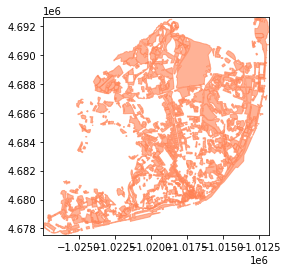

In [5]:
ax=plotBaseMap(roadsFileDir,waterFileDir,bboxEuc,bbox1,crs=crsEuc)
buildings.plot(ax=ax, color='coral', edgecolor='coral',alpha=0.6)
plt.show()

In [6]:
newBuildings={'geometry':[],'category':[]}
for i in tqdm(range(len(buildings))):
    poly=buildings.loc[i,'geometry']
    for cat in categories:
        points=pois[cat]
        points=points.loc[points['clusterID']!=-1]
        points=reorderDataframeIndex(points)
        for k in range(len(points)):
            poi=points.loc[k,'geometry'].buffer(poiBuffer)
            if poi.intersects(poly):
                newBuildings['geometry']=newBuildings.get('geometry',[])+[poly]
                newBuildings['category']=newBuildings.get('category',[])+[cat]
                break

newGDF=gpd.GeoDataFrame(newBuildings,crs=crsEuc)
writeGeodataToGis(geodf=newGDF,targetFile=newBuildingsDir,crs=crsEuc)

100%|██████████| 1086/1086 [11:45<00:00,  1.54it/s]
